In [1]:
import numpy as np
# import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
# from scipy.io import loadmat
from cmocean import cm
import glob
import pandas as pd
import warnings
import pickle
import arrow
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
#from cartopy import crs, feature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools
import netCDF4 as nc
import gsw

#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

In [3]:
print(mocsy.mvars.vars.__doc__)


ph,pco2,fco2,co2,hco3,co3,omegaa,omegac,betad,rhosw,p,tempis = vars(temp,sal,alk,dic,sil,phos,patm,depth,lat,optcon,optt,optp,[optb,optk1k2,optkf,optgas,opts,lon,verbose])

Wrapper for ``vars``.

Parameters
----------
temp : input rank-1 array('d') with bounds (n)
sal : input rank-1 array('d') with bounds (n)
alk : input rank-1 array('d') with bounds (n)
dic : input rank-1 array('d') with bounds (n)
sil : input rank-1 array('d') with bounds (n)
phos : input rank-1 array('d') with bounds (n)
patm : input rank-1 array('d') with bounds (n)
depth : input rank-1 array('d') with bounds (n)
lat : input rank-1 array('d') with bounds (n)
optcon : input string(len=6)
optt : input string(len=7)
optp : input string(len=2)

Other Parameters
----------------
optb : input string(len=3), optional
    Default: 'l10'
optk1k2 : input string(len=3), optional
    Default: 'l'
optkf : input string(len=2), optional
    Default: 'pf'
optgas : input string(len=7), optional
    Default: 'pinsitu'
opts : input s

In [46]:
fname_obs = f'./extracted_calculated/OBS_COMB_MASKED_umolL.csv'
df_obs = pd.read_csv(fname_obs)
print(df_obs.head())

ttemp = df_obs['T'][:]
tdepth = df_obs['P'][:]
tsal = df_obs['S'][:]
talk = df_obs['alk'][:]
tdic = df_obs['dic'][:]
tOmegaA = df_obs['OmegaA'][:]
tzero = np.zeros_like(tdic)

   Unnamed: 0     crid  mon  day    lat     lon      P      T       S  \
0           0  2012.19  4.0  2.0  49.03 -123.43  311.8  8.545  30.828   
1           1  2012.19  4.0  2.0  49.03 -123.43  251.3  8.323  30.726   
2           2  2012.19  4.0  2.0  49.03 -123.43  201.1  7.875  30.567   
3           3  2012.19  4.0  2.0  49.03 -123.43  150.4  7.890  30.435   
4           4  2012.19  4.0  2.0  49.03 -123.43  101.5  7.900  30.208   

           dic          alk  dic_qf  alk_qf  obs_i  obs_j    OmegaA  loc_tag  
0  2169.189770  2210.921324     2.0     2.0  264.0  422.0  0.789514      3.0  
1  2158.719688  2184.888534     2.0     2.0  264.0  422.0  0.700753      3.0  
2  2138.406432  2177.459077     2.0     2.0  264.0  422.0  0.776961      3.0  
3  2125.357392  2154.542462     6.0     6.0  264.0  422.0  0.720444      3.0  
4  2105.791090  2128.185825     2.0     2.0  264.0  422.0  0.681664      3.0  


In [6]:

#etemp, esal = 0.01, 0.01
etemp, esal = 0.0, 0.0
ealk, edic = 10e-6, 4e-6
esil = 5e-6
ephos = 0.1e-6

In [32]:
#
# ttemp = df_obs['T'][:]
# tdepth = df_obs['P'][:]
# tsal = df_obs['S'][:]
# talk = df_obs['alk'][:]
# tdic = df_obs['dic'][:]

# Options:
optCON  = 'mol/m3' 
optT    = 'Tinsitu'
optP    = 'm'      
optB    = 'l10'
#optB    = 'u74'
optK1K2 = 'm10'
optKf   = 'dg'

# Standard 6 input variables
temp   = ttemp
sal    = tsal
alk    = talk*1e-3
dic    = tdic*1e-3
phos   = tzero
sil    = tzero

# Other standard input (depth, atm pressure, latitude)
depth  = tdepth
Patm   = tzero+1       
lat    = tzero

In [55]:

#etemp, esal = 0.01, 0.01
etemp, esal = tzero, tzero

#
#etemp, esal = 0.0, 0.0
esil = tzero
ephos = tzero
ealk = np.copy(tzero)
ealk[:] = 10.e-3
edic = np.copy(tzero)
edic[:] = 4.e-3

In [56]:

[eH, epCO2, efCO2, eCO2, eHCO3, eCO3, eOmegaA, eOmegaC] = \
mocsy.merrors(
temp, sal, alk, dic, sil, phos, Patm, depth, lat,
etemp, esal, ealk, edic, esil, ephos,
optCON, optT, optP, optb=optB, optk1k2=optK1K2, optkf=optKf, optgas='Pinsitu', ebt=0.01)


max error: 0.2396511605903834
min error: 0.04989511226997372
mean error: 0.08587026221602495


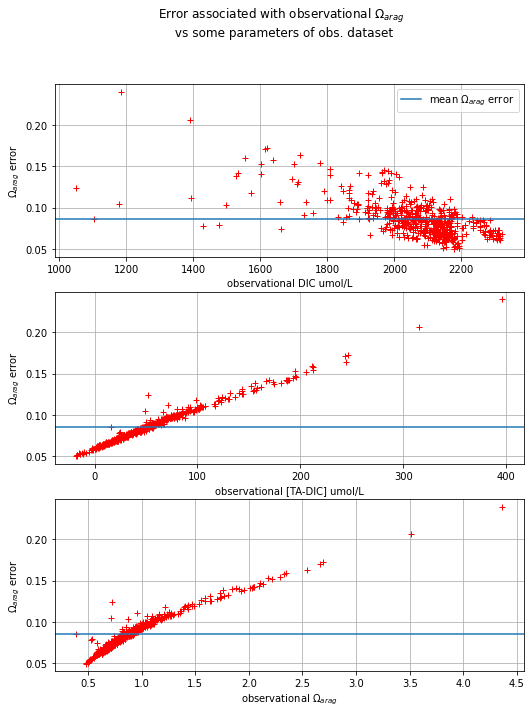

In [57]:
fact = 0.6
fig, axs = plt.subplots(3,1, figsize=(14*fact, 18*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].plot(dic*1e3,eOmegaA, color = 'r',linestyle = 'none', marker = '+')
axs[1].plot((alk-dic)*1e3,eOmegaA, color = 'r',linestyle = 'none', marker = '+')
axs[2].plot(tOmegaA,eOmegaA, color = 'r',linestyle = 'none', marker = '+')

for i in range(0,3):
    axs[i].axhline(np.nanmean(eOmegaA), label = 'mean $\Omega_{arag}$ error')
    axs[i].grid()
    axs[i].set_ylabel('$\Omega_{arag}$ error')
    axs[0].set_xlabel('observational DIC umol/L')
    axs[1].set_xlabel('observational [TA-DIC] umol/L')
    axs[2].set_xlabel('observational $\Omega_{arag}$')
    axs[0].legend(loc = 'best')

plt.suptitle('Error associated with observational $\Omega_{arag}$ \n vs some parameters of obs. dataset')

print(f'max error: {np.nanmax(eOmegaA)}')
print(f'min error: {np.nanmin(eOmegaA)}')
print(f'mean error: {np.nanmean(eOmegaA)}')